In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


## Acquire data

In [2]:
train_df = pd.read_csv('/scratch/hdharmen/train.csv')
test_df = pd.read_csv('/scratch/hdharmen/test.csv')
combine = [train_df, test_df]

## Analyze by describing data

In [3]:
print(train_df.columns.values)
# preview the data
train_df.head()
train_df.tail()
train_df.info()
print('_'*40)
test_df.info()
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`
train_df.describe(include=['O'])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 c

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by pivoting features

In [4]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

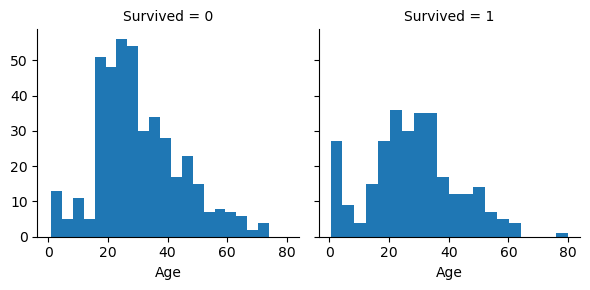

In [5]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlating numerical and ordinal features

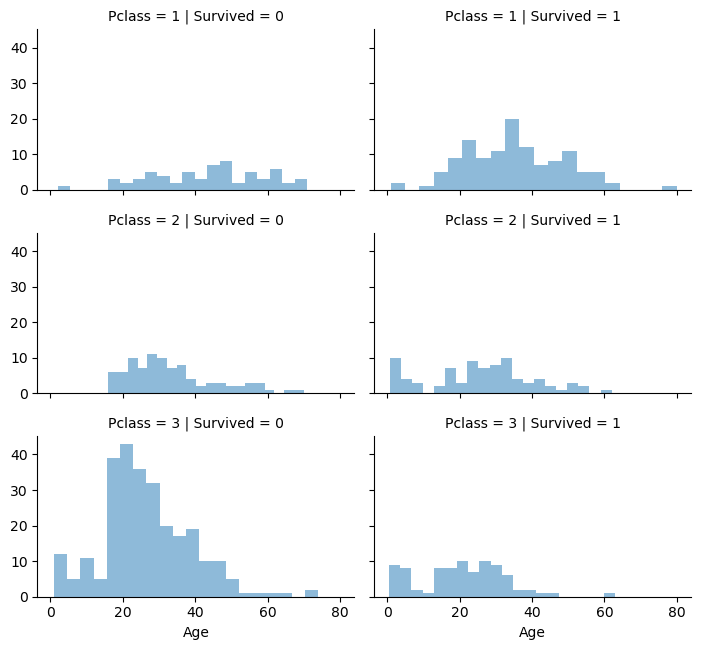

In [6]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features

/home/hdharmen/.conda/envs/cse507/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hdharmen/.conda/envs/cse507/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


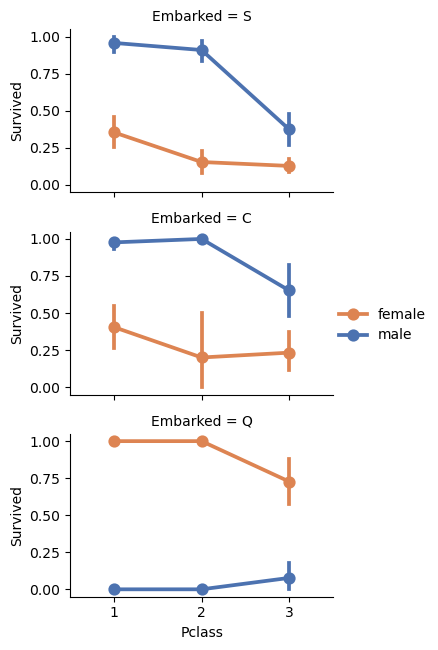

In [7]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlating categorical and numerical features

/home/hdharmen/.conda/envs/cse507/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hdharmen/.conda/envs/cse507/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hdharmen/.conda/envs/cse507/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hdharmen/.conda/envs/cse507/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hdharmen/.conda/envs/cse507/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecat

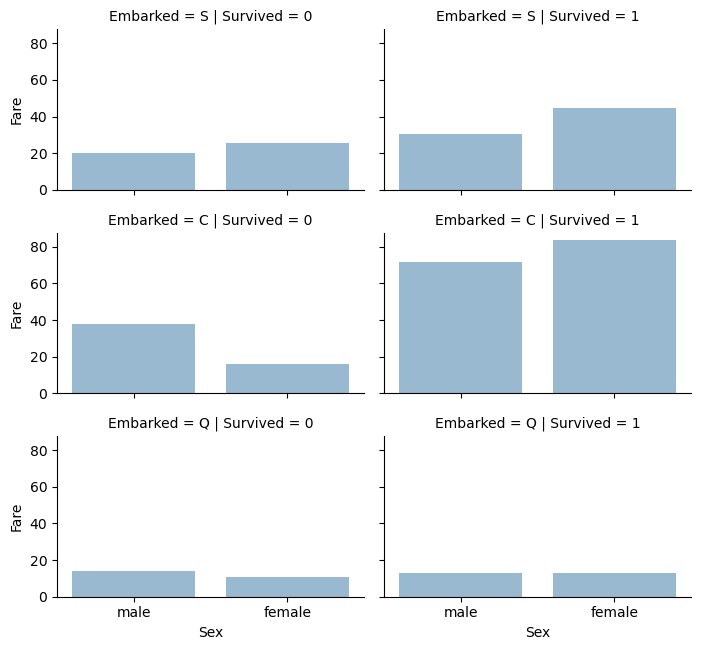

In [8]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle data

### Correcting by dropping features

In [9]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

# Keeping Cabin info instead of dropping Cabin

# train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
# test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
# combine = [train_df, test_df]

# Drop Ticket only 
train_df = train_df.drop(['Ticket'], axis=1)
test_df  = test_df.drop(['Ticket'], axis=1)

# Extract Deck from Cabin
for df in (train_df, test_df):
    df['Deck'] = df['Cabin'].fillna('U').astype(str).str[0]

# One-hot Deck
train_df = pd.get_dummies(train_df, columns=['Deck'], drop_first=True)
test_df  = pd.get_dummies(test_df,  columns=['Deck'], drop_first=True)

# Align columns
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Drop Cabin after extraction
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

# refresh combine if your later code still uses it
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 18) (418, 18)


### Creating new feature extracting from existing

In [10]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`.

In [11]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

In [12]:
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# for dataset in combine:
#     dataset['Title'] = dataset['Title'].map(title_mapping)
#     dataset['Title'] = dataset['Title'].fillna(0)

train_df = pd.get_dummies(train_df, columns=['Title'], drop_first=True)
test_df  = pd.get_dummies(test_df,  columns=['Title'], drop_first=True)

train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,...,False,False,False,False,False,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,...,False,False,False,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,...,False,False,False,False,False,True,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,...,False,False,False,False,False,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,...,False,False,False,False,False,True,False,True,False,False


In [13]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 20), (418, 21))

### Converting a categorical feature

In [14]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,1,0,7.2500,S,False,False,False,False,False,False,False,True,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,C,False,True,False,False,False,False,False,False,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,S,False,False,False,False,False,False,False,True,True,False,False,False
3,1,1,1,35.0,1,0,53.1000,S,False,True,False,False,False,False,False,False,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,S,False,False,False,False,False,False,False,True,False,True,False,False


### Completing a numerical continuous feature


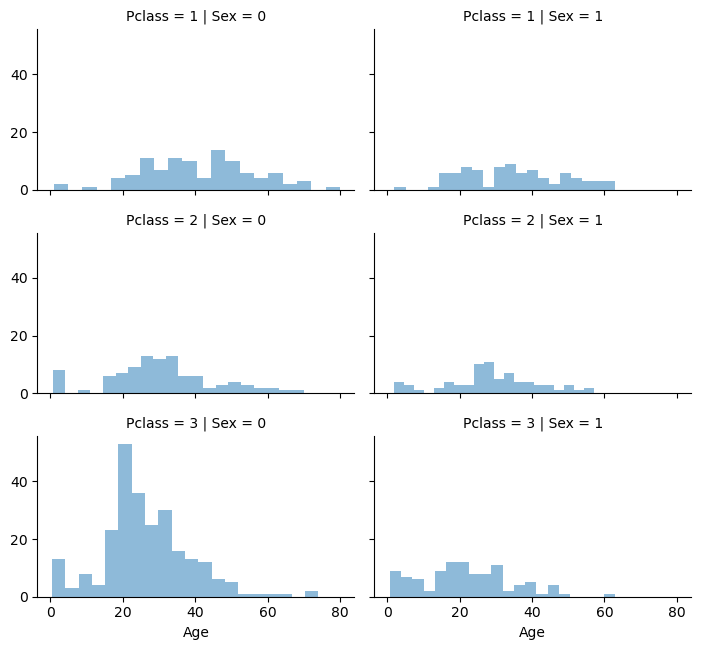

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [16]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [17]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22,1,0,7.2500,S,False,False,False,False,False,False,False,True,False,True,False,False
1,1,1,1,38,1,0,71.2833,C,False,True,False,False,False,False,False,False,False,False,True,False
2,1,3,1,26,0,0,7.9250,S,False,False,False,False,False,False,False,True,True,False,False,False
3,1,1,1,35,1,0,53.1000,S,False,True,False,False,False,False,False,False,False,False,True,False
4,0,3,0,35,0,0,8.0500,S,False,False,False,False,False,False,False,True,False,True,False,False


In [18]:
#train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
#train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [19]:
# for dataset in combine:    
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']

# Improving Age handling
for dataset in combine:
    dataset['Age_missing'] = dataset['Age'].isna().astype(int)

for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(float)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_B,Deck_C,...,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_missing
0,0,3,0,22.0,1,0,7.2500,S,False,False,...,False,False,False,False,True,False,True,False,False,0
1,1,1,1,38.0,1,0,71.2833,C,False,True,...,False,False,False,False,False,False,False,True,False,0
2,1,3,1,26.0,0,0,7.9250,S,False,False,...,False,False,False,False,True,True,False,False,False,0
3,1,1,1,35.0,1,0,53.1000,S,False,True,...,False,False,False,False,False,False,False,True,False,0
4,0,3,0,35.0,0,0,8.0500,S,False,False,...,False,False,False,False,True,False,True,False,False,0


In [20]:
#train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_B,Deck_C,...,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_missing
0,0,3,0,22.0,1,0,7.2500,S,False,False,...,False,False,False,False,True,False,True,False,False,0
1,1,1,1,38.0,1,0,71.2833,C,False,True,...,False,False,False,False,False,False,False,True,False,0
2,1,3,1,26.0,0,0,7.9250,S,False,False,...,False,False,False,False,True,True,False,False,False,0
3,1,1,1,35.0,1,0,53.1000,S,False,True,...,False,False,False,False,False,False,False,True,False,0
4,0,3,0,35.0,0,0,8.0500,S,False,False,...,False,False,False,False,True,False,True,False,False,0


### Create new feature combining existing features

In [21]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [22]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [23]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_missing,IsAlone
0,0,3,0,22.0,7.2500,S,False,False,False,False,False,False,False,True,False,True,False,False,0,0
1,1,1,1,38.0,71.2833,C,False,True,False,False,False,False,False,False,False,False,True,False,0,0
2,1,3,1,26.0,7.9250,S,False,False,False,False,False,False,False,True,True,False,False,False,0,1
3,1,1,1,35.0,53.1000,S,False,True,False,False,False,False,False,False,False,False,True,False,0,0
4,0,3,0,35.0,8.0500,S,False,False,False,False,False,False,False,True,False,True,False,False,0,1


In [24]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,66.0,22.0,3
1,38.0,38.0,1
2,78.0,26.0,3
3,35.0,35.0,1
4,105.0,35.0,3
5,75.0,25.0,3
6,54.0,54.0,1
7,6.0,2.0,3
8,81.0,27.0,3
9,28.0,14.0,2


### Completing a categorical feature

In [25]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [26]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
# train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

### Converting categorical feature to numeric

In [27]:
# for dataset in combine:
#     dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# one-hot
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df  = pd.get_dummies(test_df,  columns=['Embarked'], drop_first=True)

# align columns (important after one-hot)
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,...,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_missing,IsAlone,Age*Class,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,False,False,False,False,False,...,True,False,True,False,False,0,0,66.0,False,True
1,1,1,1,38.0,71.2833,False,True,False,False,False,...,False,False,False,True,False,0,0,38.0,False,False
2,1,3,1,26.0,7.9250,False,False,False,False,False,...,True,True,False,False,False,0,1,78.0,False,True
3,1,1,1,35.0,53.1000,False,True,False,False,False,...,False,False,False,True,False,0,0,35.0,False,True
4,0,3,0,35.0,8.0500,False,False,False,False,False,...,True,False,True,False,False,0,1,105.0,False,True


### Quick completing and converting a numeric feature

In [28]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

/tmp/ipykernel_3706335/31889810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,Survived,Pclass,Sex,Age,Fare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,...,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_missing,IsAlone,Age*Class,Embarked_Q,Embarked_S
0,0,3,0,34.0,7.8292,False,False,False,False,False,...,True,False,True,False,False,0,1,102.0,True,False
1,0,3,1,47.0,7.0000,False,False,False,False,False,...,True,False,False,True,False,0,0,141.0,False,True
2,0,2,0,62.0,9.6875,False,False,False,False,False,...,True,False,True,False,False,0,1,124.0,True,False
3,0,3,0,27.0,8.6625,False,False,False,False,False,...,True,False,True,False,False,0,1,81.0,False,True
4,0,3,1,22.0,12.2875,False,False,False,False,False,...,True,False,False,True,False,0,0,66.0,False,True


In [29]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


/tmp/ipykernel_3706335/2178404912.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [30]:
# for dataset in combine:
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
#     dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)

# Improving Fare
for dataset in combine:
    dataset['Fare'] = np.log1p(dataset['Fare'])
    
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,...,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_missing,IsAlone,Age*Class,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,False,False,False,False,False,...,True,False,True,False,False,0,0,66.0,False,True
1,1,1,1,38.0,71.2833,False,True,False,False,False,...,False,False,False,True,False,0,0,38.0,False,False
2,1,3,1,26.0,7.9250,False,False,False,False,False,...,True,True,False,False,False,0,1,78.0,False,True
3,1,1,1,35.0,53.1000,False,True,False,False,False,...,False,False,False,True,False,0,0,35.0,False,True
4,0,3,0,35.0,8.0500,False,False,False,False,False,...,True,False,True,False,False,0,1,105.0,False,True
5,0,3,0,25.0,8.4583,False,False,False,False,False,...,True,False,True,False,False,0,1,75.0,True,False
6,0,1,0,54.0,51.8625,False,False,False,True,False,...,False,False,True,False,False,0,1,54.0,False,True
7,0,3,0,2.0,21.0750,False,False,False,False,False,...,True,False,False,False,False,0,0,6.0,False,True
8,1,3,1,27.0,11.1333,False,False,False,False,False,...,True,False,False,True,False,0,0,81.0,False,True
9,1,2,1,14.0,30.0708,False,False,False,False,False,...,True,False,False,True,False,0,0,28.0,False,False


In [31]:
test_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,...,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_missing,IsAlone,Age*Class,Embarked_Q,Embarked_S
0,0,3,0,34.0,2.178064,False,False,False,False,False,...,True,False,True,False,False,0,1,102.0,True,False
1,0,3,1,47.0,2.079442,False,False,False,False,False,...,True,False,False,True,False,0,0,141.0,False,True
2,0,2,0,62.0,2.369075,False,False,False,False,False,...,True,False,True,False,False,0,1,124.0,True,False
3,0,3,0,27.0,2.268252,False,False,False,False,False,...,True,False,True,False,False,0,1,81.0,False,True
4,0,3,1,22.0,2.586824,False,False,False,False,False,...,True,False,False,True,False,0,0,66.0,False,True
5,0,3,0,14.0,2.324836,False,False,False,False,False,...,True,False,True,False,False,0,1,42.0,False,True
6,0,3,1,30.0,2.155152,False,False,False,False,False,...,True,True,False,False,False,0,1,90.0,True,False
7,0,2,0,26.0,3.401197,False,False,False,False,False,...,True,False,True,False,False,0,0,52.0,False,True
8,0,3,1,18.0,2.107689,False,False,False,False,False,...,True,False,False,True,False,0,1,54.0,False,False
9,0,3,0,21.0,3.224858,False,False,False,False,False,...,True,False,True,False,False,0,0,63.0,False,True


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [32]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
#X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test = test_df.reindex(columns=X_train.columns, fill_value=0).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 21), (891,), (418, 21))

In [33]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/home/hdharmen/.conda/envs/cse507/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.48

In [34]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.194330
7,Deck_E,1.048479
14,Title_Mrs,0.951861
6,Deck_D,0.848953
17,IsAlone,0.537547
8,Deck_F,0.478451
4,Deck_B,0.189981
12,Title_Miss,0.051287
3,Fare,0.003371
16,Age_missing,0.000000


In [35]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

70.59

In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [37]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.22

In [38]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

66.55

In [39]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

82.04

In [40]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.21

In [41]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.54

In [42]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.54

### Model evaluation 

In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
8,Decision Tree,98.54
1,KNN,83.95
7,Linear SVC,82.04
2,Logistic Regression,81.48
4,Naive Bayes,77.22
6,Stochastic Gradient Decent,76.21
0,Support Vector Machines,70.59
5,Perceptron,66.55


In [44]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X_train, Y_train, cv=5)

scores.mean(), scores.std()

(np.float64(0.8092021844203126), np.float64(0.03118143158059099))